- **Name:** Ernesto T. Martinez Jr
- **Term:** Term 3 BSCPE - 2A

### Machine Problem 004: Block Diagram
    

#### Summary

Block diagrams allow you to visualize the flow of information in complex dynamical systems. Using simple elements, it is possible to create models to study the relationship between control structure, process response, and control action.

The purpose of this notebook is to introduce for the analysis of block diagrams made up of linear transfer functions. 

#### Block Diagram for Car Cruise Control

Let's imagine you own a car with a mass of 1,500 kg (including passengers) that is traveling down a level stretch of highway at a desired speed of 100 kilometers per hour. You wish to design a cruise controller that will adjust the throttle position $u$ within the limits 0 to 1 in order to maintain constant speed. 

A block diagram for this system is shown in the following sketch:

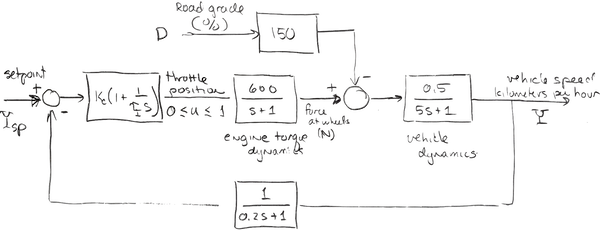

The disturbance to the system is a change in road grade measured in percent.  (A one percent grade corresponds to 1 foot of rise in 100 feet of horizontal travel, or a tangent of 0.01).  The dynamics are represented by three transfer functions denoting the response of the engine torque to throttle position,

$$G_e = \frac{600}{s + 1}$$

the response of the vehicle to engine and external forces, 

$$G_v = \frac{0.5}{5s + 1}$$

and the dynamics of the speed measurement,

$$G_m = \frac{1}{0.2s + 1}$$

We assume that a one percent increase in grade introduces 150 Newtons of force in opposing the car acceleration, that is

$$G_d = 150$$

The controller is assumed to be a proportional-integral control written as

$$G_c = K_c\left(1 + \frac{1}{\tau_I s}\right)$$

This can be summarized in the following block diagram

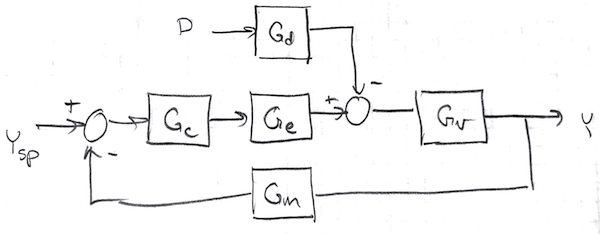

In [6]:
!pip install control

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import control.matlab as control

# control constants
Kc = 0.01
tauI = 10

# control transfer function
Gc = Kc*control.tf([tauI,1],[tauI,0])

# model transfer functions
Gd = control.tf([150],[1])
Ge = control.tf([600],[1,1])
Gv = control.tf([0.5],[5,1])
Gm = control.tf([1],[0.2,1])

#### Closed-Loop Transfer Functions

Vehicle response to a change in setpoint:

$$H_{yr} = \frac{G_vG_eG_c}{1+G_vG_eG_cG_m}$$

Vehicle response to a disturbance:

$$H_{yd} = -\frac{G_vG_d}{1+G_vG_eG_cG_m}$$

Throttle response to a change in setpoint:

$$H_{ur} = \frac{G_c}{1+G_cG_mG_vG_e}$$

Throttle response to a disturbance:

$$H_{ud} = \frac{G_cG_mG_vG_d}{1+G_cG_mG_vG_e}$$


In [10]:
Hyr = Gv*Ge*Gc/(1+Gv*Ge*Gc*Gm)
Hyd = -Gv*Gd/(1+Gv*Ge*Gc*Gm)
Hur = Gc/(1+Gc*Gm*Gv*Ge)
Hud = Gc*Gm*Gv*Gd/(1+Gc*Gm*Gv*Ge)

In [9]:
print(Hyr)

<TransferFunction>: sys[21]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

             300 s^5 + 1890 s^4 + 2046 s^3 + 486 s^2 + 30 s
  --------------------------------------------------------------------
  500 s^7 + 3700 s^6 + 6920 s^5 + 6340 s^4 + 3170 s^3 + 580 s^2 + 30 s


In [11]:
print(Hyd)

<TransferFunction>: sys[81]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

      -750 s^4 - 4650 s^3 - 4650 s^2 - 750 s
  -----------------------------------------------
  50 s^5 + 320 s^4 + 372 s^3 + 262 s^2 + 55 s + 3


In [12]:
print(Hur)

<TransferFunction>: sys[87]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

  s^5 + 6.3 s^4 + 6.82 s^3 + 1.62 s^2 + 0.1 s
  --------------------------------------------
  100 s^5 + 620 s^4 + 620 s^3 + 400 s^2 + 30 s


In [13]:
print(Hud)

<TransferFunction>: sys[96]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']

           75 s^5 + 472.5 s^4 + 511.5 s^3 + 121.5 s^2 + 7.5 s
  --------------------------------------------------------------------
  100 s^7 + 1140 s^6 + 3944 s^5 + 4244 s^4 + 2730 s^3 + 556 s^2 + 30 s


#### Step Responses

Text(0, 0.5, 'Throttle Setting')

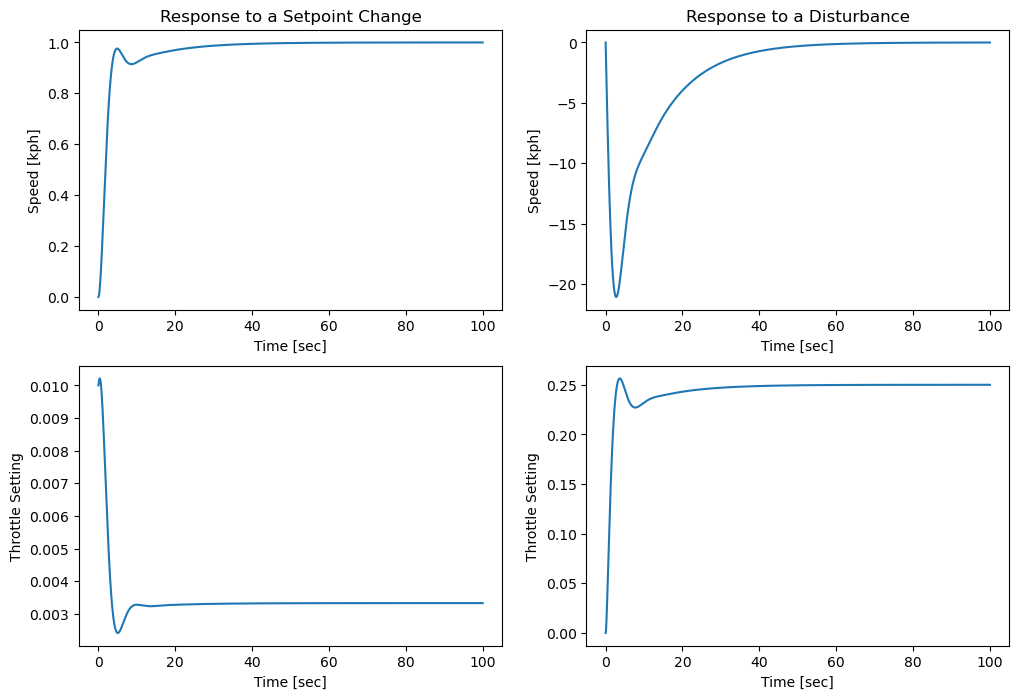

In [14]:
t = np.linspace(0,100,1000)
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
yr,t = control.step(Hyr,t)
plt.plot(t,yr)
plt.xlabel('Time [sec]')
plt.ylabel('Speed [kph]')
plt.title('Response to a Setpoint Change')

plt.subplot(2,2,2)
yd,t = control.step(Hyd,t)
plt.plot(t,yd)
plt.xlabel('Time [sec]')
plt.ylabel('Speed [kph]')
plt.title('Response to a Disturbance')

plt.subplot(2,2,3)
ur,t = control.step(Hur,t)
plt.plot(t,ur)
plt.xlabel('Time [sec]')
plt.ylabel('Throttle Setting')

plt.subplot(2,2,4)
ud,t = control.step(Hud,t)
plt.plot(t,ud)
plt.xlabel('Time [sec]')
plt.ylabel('Throttle Setting')


#### Additional Examples

##### Internal Model Control

Internal model control is a version of feedback control that incorporates an explicit process model. A simple block diagram of internal model control is given by

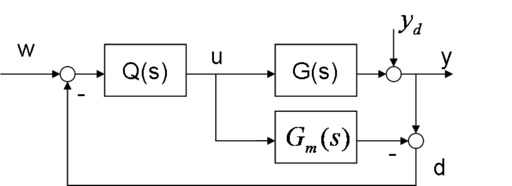

There are two designated inputs, the reference $w$ and disturbance $y_d$, and three labeled signals $u$, $y$, and $d$ that appear relevant to closed-loop performance. Here's the solution for all six closed-loop transfer transfer functions:

| Output\Input | $w$ | $y_d$ |
| :----------: | :-: | :---: |
| $u$ | $\frac{Q}{1 + Q(G - G_m)}$ | $-\frac{Q}{1 + Q(G - G_m)}$ |
| $y$ | $\frac{GQ}{1 + Q(G - G_m)}$ | $\frac{1}{1 + Q(G - G_m)}$ |
| $d$ | $\frac{(G-G_m)Q}{1 + Q(G - G_m)}$ | $\frac{1}{1 + Q(G - G_m)}$ |


##### SEMD

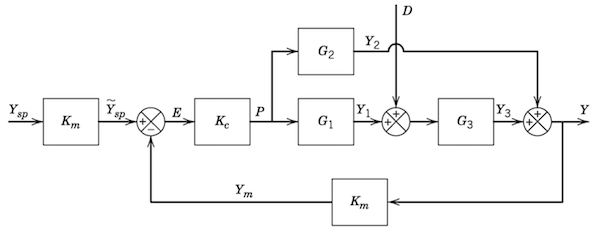


$$H_{yd} = \frac{G_3}{1+(G_2 + G_3G_1)K_cK_m}$$

$$H_{yr} = \frac{(G_2+G_3G_1)K_cK_m}{1+(G_2 + G_3G_1)K_cK_m}$$


